# Cancer Patients
- Data Assessment
- Identifying outliers
- Data Cleaning
- EDA: Check for normality
    - Visual Tests
    - Statistical Tests
    - Research questions
- EDA: Descriptive Statistics Analysis
- EDA: Hypothesis testing
    - Effect size and Power
    - Mann-Whitney U Test
    - Kruskal Wallis Test
- EDA: Predictive Modeling
    - Reliabilty and Validity of Analysis
    - Multinomial logistic regression
- Insights

https://www.canva.com/design/DAFbNLiYua4/nu3sXUZaPwLnUWFRFvEbJA/edit?utm_content=DAFbNLiYua4&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton

In [91]:
import pandas as pd
import numpy as np

from scipy import stats as sp
from scipy.stats import kstest
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal


import matplotlib.pyplot as plt
import seaborn as sb

import statsmodels.api as sm
from statsmodels.stats.power import TTestIndPower

%matplotlib inline

__Load data from excel file__

In [2]:
cancer_df = pd.read_excel('cancer_patient.xlsx')

In [3]:
cancer_df.shape

(1000, 25)

In [4]:
#View the first 5 rows
cancer_df.head().transpose()

,0,1,2,3,4
Patient Id,P1,P10,P100,P1000,P101
Age,33.0,17.0,35.0,37.0,46.0
Gender,1.0,1.0,1.0,1.0,1.0
Air Pollution,2.0,3.0,4.0,7.0,6.0
Alcohol use,4.0,1.0,5.0,7.0,8.0
Dust Allergy,5.0,5.0,6.0,7.0,7.0
OccuPational Hazards,4.0,3.0,5.0,7.0,7.0
Genetic Risk,3.0,4.0,5.0,6.0,7.0
chronic Lung Disease,2,2,4,7,6
Balanced Diet,2.0,2.0,6.0,7.0,7.0


In [5]:
#summary info
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient Id                1000 non-null   object 
 1   Age                       997 non-null    float64
 2   Gender                    994 non-null    float64
 3   Air Pollution             991 non-null    float64
 4   Alcohol use               988 non-null    float64
 5   Dust Allergy              993 non-null    float64
 6   OccuPational Hazards      994 non-null    float64
 7   Genetic Risk              994 non-null    float64
 8   chronic Lung Disease      1000 non-null   int64  
 9   Balanced Diet             995 non-null    float64
 10  Obesity                   992 non-null    float64
 11  Smoking                   993 non-null    float64
 12  Passive Smoker            996 non-null    float64
 13  Chest Pain                992 non-null    float64
 14  Coughing 

In [6]:
# number of missing values
cancer_df.isnull().sum().sort_values(ascending = False)

Coughing of Blood           13
Alcohol use                 12
Shortness of Breath         10
Air Pollution                9
Obesity                      8
Chest Pain                   8
Smoking                      7
Dust Allergy                 7
Swallowing Difficulty        7
Gender                       6
OccuPational Hazards         6
Genetic Risk                 6
Wheezing                     6
Fatigue                      5
Weight Loss                  5
Balanced Diet                5
Clubbing of Finger Nails     4
Passive Smoker               4
Age                          3
Frequent Cold                3
Dry Cough                    0
Snoring                      0
Patient Id                   0
chronic Lung Disease         0
Level                        0
dtype: int64

In [7]:
# are there any duplicate rows?
cancer_df.duplicated().sum()

0

In [8]:
# summary statistics
cancer_df.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Patient Id,1000,1000,P1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,997.0,NaN,NaN,NaN,37.185557,12.00396,14.0,28.0,36.0,45.0,73.0
Gender,994.0,NaN,NaN,NaN,1.400402,0.490227,1.0,1.0,1.0,2.0,2.0
Air Pollution,991.0,NaN,NaN,NaN,3.837538,2.032276,1.0,2.0,3.0,6.0,8.0
Alcohol use,988.0,NaN,NaN,NaN,4.577935,2.619582,1.0,2.0,5.0,7.0,8.0
Dust Allergy,993.0,NaN,NaN,NaN,5.225579,2.767079,1.0,4.0,6.0,7.0,66.0
OccuPational Hazards,994.0,NaN,NaN,NaN,4.837022,2.107293,1.0,3.0,5.0,7.0,8.0
Genetic Risk,994.0,NaN,NaN,NaN,4.583501,2.125842,1.0,2.25,5.0,7.0,7.0
chronic Lung Disease,1000.0,NaN,NaN,NaN,4.38,1.848518,1.0,3.0,4.0,6.0,7.0
Balanced Diet,995.0,NaN,NaN,NaN,5.184925,22.152435,1.0,2.0,4.0,7.0,700.0


In [9]:
cancer_df.Gender.mode()

0    1.0
dtype: float64

### Data Description
The features of these dataset are Patient Id, Gender, and 23 syptoms of cancer patients rated from 1 to 10. With 1 being less severe and 10 being more severe. As well as the last column indicating the level of cancer.

## Data Assesment
The following data quality and tidiness issues were discovered:

__Missing data__(can I use the mean/mode to replace the value?)

There 123 missing data stored as 'nan'

Coughing of Blood           13
Alcohol use                 12
Shortness of Breath         10
Air Pollution                9
Obesity                      8
Chest Pain                   8
Smoking                      7
Dust Allergy                 7
Swallowing Difficulty        7
Gender                       6
OccuPational Hazards         6
Genetic Risk                 6
Wheezing                     6
Fatigue                      5
Weight Loss                  5
Balanced Diet                5
Clubbing of Finger Nails     4
Passive Smoker               4
Age                          3
Frequent Cold                3

__Messy data (Structural issues)__
- Column headings have spaces
- Gender column has Male stored as 1 and Female stored as 2

__Invalid data__ (can I a scatter plot/box plots to detect outliers)
- Score for the factors are floats
- Dust Allergy has a level of 66
- Balanced Diet has a rating of 700
- Weight Loss has a rating of 20
- Passive Smoker has a rating 222
- Wheesing has a rating of 11
- Fatigue has a rating of 222

In [10]:
print(cancer_df['Age'].unique())
print(cancer_df['Frequent Cold'].unique())
print(cancer_df['Genetic Risk'].unique())

[33. 17. 35. 37. 46. 52. 28. 44. 64. 39. 34. 27. 73. nan 36. 14. 24. 53.
 62. 29. 65. 19. 42. 32. 25. 45. 26. 48. 22. 38. 18. 23. 47. 61. 55. 31.
 49. 43. 51. 54. 63.]
[ 2.  1.  6.  4.  3. nan  7.  5.]
[ 3.  4.  5.  6.  7.  2. nan  1.]


## Data Cleaning

In [11]:
# copy dataframe before cleaning
cancer_df_clean = cancer_df.copy()

In [12]:
# Replace 1 with male and 2 with female in the Gender column
cancer_df_clean['Gender'] = cancer_df_clean['Gender'].apply(lambda x: 'Male' if x == 1 else 'Female')

In [13]:
cancer_df_clean.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33.0,Male,2.0,4.0,5.0,4.0,3.0,2,2.0,...,3.0,4.0,2.0,2.0,3.0,1.0,2.0,3,4,Low
1,P10,17.0,Male,3.0,1.0,5.0,3.0,4.0,2,2.0,...,1.0,3.0,7.0,8.0,6.0,2.0,1.0,7,2,Medium
2,P100,35.0,Male,4.0,5.0,6.0,5.0,5.0,4,6.0,...,8.0,7.0,9.0,2.0,1.0,4.0,6.0,7,2,High
3,P1000,37.0,Male,7.0,7.0,7.0,7.0,6.0,7,7.0,...,4.0,2.0,3.0,1.0,4.0,5.0,6.0,7,5,High
4,P101,46.0,Male,6.0,8.0,7.0,7.0,7.0,6,7.0,...,3.0,NaN,4.0,1.0,4.0,2.0,4.0,2,3,High


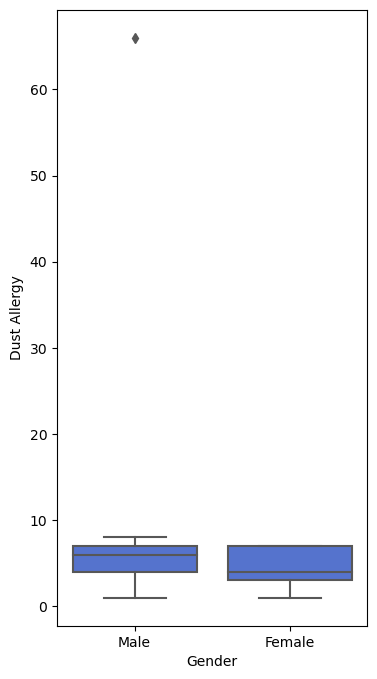

In [14]:
#boxplot indicating Dust Allergey outliers
plt.figure(figsize = [4,8])
sb.boxplot(data = cancer_df_clean, x ='Gender' , y = 'Dust Allergy', color = 'royalblue');
#plt.title('Loan Term and APR', fontsize=16);

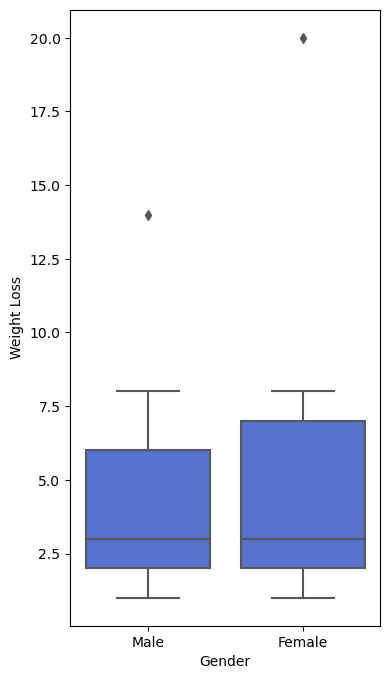

In [15]:
#boxplot indicating Weight Loss outliers
plt.figure(figsize = [4,8])
sb.boxplot(data = cancer_df_clean, x ='Gender' , y = 'Weight Loss', color = 'royalblue');
#plt.title('Loan Term and APR', fontsize=16);

In [16]:
#replace all NaN with the most frequent age
cancer_df_clean.Age.fillna(35, inplace = True)

In [17]:
# Replace High with 3, Medium with 2 and Low with 1 in the Level column
cancer_df_clean['Level'] = cancer_df_clean['Level'].apply(lambda x: 3  
                                                        if x == 'High' 
                                                        else ( 2 if x == 'Medium' 
                                                              else 1))

In [18]:
#drop rows of missing values
cancer_df_clean = cancer_df_clean.dropna(axis = 0)

In [19]:
# round up all floats
#cancer_patient_1.round(0).astype(int)
cancer_df_clean.loc[:,'Air Pollution':'Level'] = cancer_df_clean.loc[:,'Air Pollution':'Level'].round(0).astype(int)
cancer_df_clean.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33.0,Male,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,1
1,P10,17.0,Male,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,2
2,P100,35.0,Male,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,3
3,P1000,37.0,Male,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,3
5,P102,35.0,Male,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,3


In [20]:
cancer_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 904 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient Id                904 non-null    object 
 1   Age                       904 non-null    float64
 2   Gender                    904 non-null    object 
 3   Air Pollution             904 non-null    int32  
 4   Alcohol use               904 non-null    int32  
 5   Dust Allergy              904 non-null    int32  
 6   OccuPational Hazards      904 non-null    int32  
 7   Genetic Risk              904 non-null    int32  
 8   chronic Lung Disease      904 non-null    int32  
 9   Balanced Diet             904 non-null    int32  
 10  Obesity                   904 non-null    int32  
 11  Smoking                   904 non-null    int32  
 12  Passive Smoker            904 non-null    int32  
 13  Chest Pain                904 non-null    int32  
 14  Coughing o

As seen above,less than 10% of the rows are deleted,from 1000 to 904

### Dealing with outliers

In [21]:
#Values above the 99th percentile
q_smoker = cancer_df_clean['Passive Smoker'].quantile(1)
q_dust = cancer_df_clean['Dust Allergy'].quantile(1)
q_tired = cancer_df_clean['Fatigue'].quantile(1)
q_weight = cancer_df_clean['Weight Loss'].quantile(1)
q_wheezing = cancer_df_clean['Wheezing'].quantile(1)

In [22]:
cancer_df_clean = cancer_df_clean[cancer_df_clean['Passive Smoker'] < q_smoker]

In [23]:
cancer_df_clean = cancer_df_clean[cancer_df_clean['Dust Allergy'] < q_dust]

In [24]:
cancer_df_clean = cancer_df_clean[cancer_df_clean['Fatigue'] < q_tired]

In [25]:
cancer_df_clean = cancer_df_clean[cancer_df_clean['Weight Loss'] < q_weight]

In [26]:
cancer_df_clean = cancer_df_clean[cancer_df_clean['Wheezing'] < q_wheezing]

In [27]:
cancer_df_clean.describe(include='all').transpose()
#cancer_patient_1.info()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Patient Id,899,899,P1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,899.0,NaN,NaN,NaN,37.285873,11.932509,14.0,28.0,36.0,45.0,73.0
Gender,899,2,Male,531,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Air Pollution,899.0,NaN,NaN,NaN,3.885428,2.034009,1.0,2.0,3.0,6.0,8.0
Alcohol use,899.0,NaN,NaN,NaN,4.622914,2.610406,1.0,2.0,5.0,7.0,8.0
Dust Allergy,899.0,NaN,NaN,NaN,5.201335,1.968731,1.0,4.0,6.0,7.0,8.0
OccuPational Hazards,899.0,NaN,NaN,NaN,4.864294,2.114075,1.0,3.0,5.0,7.0,8.0
Genetic Risk,899.0,NaN,NaN,NaN,4.622914,2.127131,1.0,3.0,5.0,7.0,7.0
chronic Lung Disease,899.0,NaN,NaN,NaN,4.395996,1.836595,1.0,3.0,4.0,6.0,7.0
Balanced Diet,899.0,NaN,NaN,NaN,4.518354,2.144669,1.0,2.0,5.0,7.0,7.0


## Check the normality of the data

### Perform Kolmogorov-Smirnov test on one sample

In [28]:
#TO DO: CRETAE HISTOGRAMS/BOXPLOTS FOR THESE. create a table based on the results
print(kstest(cancer_df_clean['Age'],'norm'))
print(kstest(cancer_df_clean['Genetic Risk'],'norm'))
print(kstest(cancer_df_clean['chronic Lung Disease'],'norm'))
print(kstest(cancer_df_clean['Coughing of Blood'],'norm'))
print(kstest(cancer_df_clean['Shortness of Breath'],'norm'))
print(kstest(cancer_df_clean['Passive Smoker'],'norm'))
print(kstest(cancer_df_clean['Smoking'],'norm'))
print(kstest(cancer_df_clean['Balanced Diet'],'norm'))
print(kstest(cancer_df_clean['Obesity'],'norm'))
print(kstest(cancer_df_clean['Alcohol use'],'norm'))
print(kstest(cancer_df_clean['Fatigue'],'norm'))
print(kstest(cancer_df_clean['Dust Allergy'],'norm'))
print(kstest(cancer_df_clean['Chest Pain'],'norm'))
print(kstest(cancer_df_clean['OccuPational Hazards'],'norm'))
print(kstest(cancer_df_clean['Level'],'norm'))

KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=0.9383177212220098, pvalue=0.0)
KstestResult(statistic=0.9260819036469264, pvalue=0.0)
KstestResult(statistic=0.9082843508104415, pvalue=0.0)
KstestResult(statistic=0.90272261554904, pvalue=0.0)
KstestResult(statistic=0.9249695565946462, pvalue=0.0)
KstestResult(statistic=0.8413447460685429, pvalue=0.0)
KstestResult(statistic=0.934980680065169, pvalue=0.0)
KstestResult(statistic=0.9060596567058808, pvalue=0.0)
KstestResult(statistic=0.8413447460685429, pvalue=0.0)
KstestResult(statistic=0.8693522039806306, pvalue=0.0)
KstestResult(statistic=0.9205201683855249, pvalue=0.0)
KstestResult(statistic=0.9249695565946462, pvalue=0.0)
KstestResult(statistic=0.8413447460685429, pvalue=0.0)


From the output we can see that the test statistic is 0.9272 with a p-value of zero for a sample of 1000. Since p-value  < 0.05, we reject the null hypothesis and conclude that the sample data does not come from a normal distribution.

In [29]:
cancer_patients = cancer_df_clean.filter(['Age','Gender','Genetic Risk','chronic Lung Disease','Coughing of Blood',
                                         'Shortness of Breath','Passive Smoker','Smoking','Balanced Diet','Obesity',
                                         'Alcohol use','Fatigue','Dust Allergy','Chest Pain','OccuPational Hazards','Level'])

In [30]:
cancer_patients.corr(method='spearman')

,Age,Genetic Risk,chronic Lung Disease,Coughing of Blood,Shortness of Breath,Passive Smoker,Smoking,Balanced Diet,Obesity,Alcohol use,Fatigue,Dust Allergy,OccuPational Hazards,Level
Age,1.000000,0.051784,0.120972,0.063006,-0.015544,0.003056,0.048744,-0.031044,0.049345,0.139218,0.130671,0.039456,0.062891,0.069142
Genetic Risk,0.051784,1.000000,0.798196,0.540188,0.479167,0.540735,0.470578,0.641144,0.715208,0.855681,0.156429,0.827443,0.881003,0.679553
chronic Lung Disease,0.120972,0.798196,1.000000,0.587105,0.204017,0.529867,0.511707,0.626340,0.605262,0.764077,0.256416,0.698547,0.861873,0.622662
Coughing of Blood,0.063006,0.540188,0.587105,1.000000,0.268957,0.582493,0.522767,0.690508,0.789685,0.594653,0.483912,0.589902,0.612479,0.770312
Shortness of Breath,-0.015544,0.479167,0.204017,0.268957,1.000000,0.117778,0.029384,0.279087,0.397251,0.428525,0.231309,0.499797,0.383104,0.476334
Passive Smoker,0.003056,0.540735,0.529867,0.582493,0.117778,1.000000,0.637014,0.726049,0.654297,0.487642,0.420249,0.572234,0.524718,0.681739
Smoking,0.048744,0.470578,0.511707,0.522767,0.029384,0.637014,1.000000,0.661338,0.403121,0.507947,0.198403,0.384174,0.454513,0.487916
Balanced Diet,-0.031044,0.641144,0.626340,0.690508,0.279087,0.726049,0.661338,1.000000,0.662780,0.578696,0.395345,0.649173,0.681132,0.707593
Obesity,0.049345,0.715208,0.605262,0.789685,0.397251,0.654297,0.403121,0.662780,1.000000,0.626566,0.519032,0.690179,0.725231,0.822654
Alcohol use,0.139218,0.855681,0.764077,0.594653,0.428525,0.487642,0.507947,0.578696,0.626566,1.000000,0.173014,0.844121,0.854455,0.678237


In [64]:
sb.set_style('dark')

### Distribution of Cancer Levels

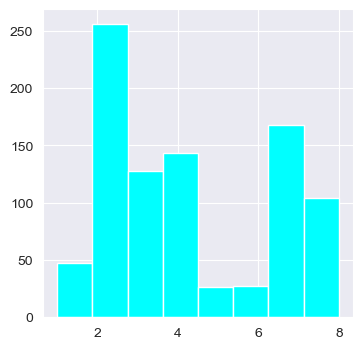

In [65]:
plt.figure(figsize=[4, 4])
cancer_patients['Passive Smoker'].hist(color = 'cyan',bins = 8)
plt.show();


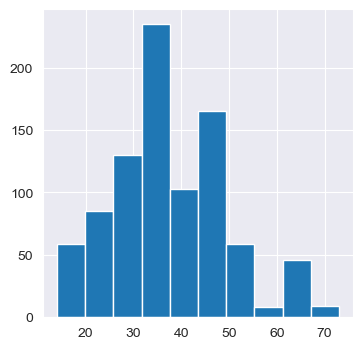

In [66]:
plt.figure(figsize=[4, 4])
cancer_patients['Age'].hist()
plt.show();


In [33]:
#cancer_df_clean.describe().transpose()

From the shape of the histogram and the desdriptive statistics we see that the Feature that is normally distributed is Age.

In [34]:
#plt.scatter(x = cancer_df_clean['chronic Lung Disease'], y = cancer_df_clean['Smoking'])

plt.figure(figsize=[14, 14])
sb.heatmap(cancer_df_clean.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)
plt.show()

# Load partially cleaned data from excel

In [35]:
cancer_patient = pd.read_excel('cancer_patient.xlsx')

In [36]:
#print(cancer_patient.shape)
#cancer_patient.head().transpose()

plt.figure(figsize = [8,8])
sb.boxplot(data = cancer_patient, x ='Gender' , y = 'Level', color = 'cyan');

In [37]:
print(cancer_patient.Age.mode());
print(cancer_patient.Age.mean());
print(cancer_patient.Age.median());

0    35.0
dtype: float64
37.18555667001003
36.0


### Exploring descriptive statistics of variables

In [38]:
cancer_patient.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Patient Id,1000,1000,P1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,997.0,NaN,NaN,NaN,37.185557,12.00396,14.0,28.0,36.0,45.0,73.0
Gender,994.0,NaN,NaN,NaN,1.400402,0.490227,1.0,1.0,1.0,2.0,2.0
Air Pollution,991.0,NaN,NaN,NaN,3.837538,2.032276,1.0,2.0,3.0,6.0,8.0
Alcohol use,988.0,NaN,NaN,NaN,4.577935,2.619582,1.0,2.0,5.0,7.0,8.0
Dust Allergy,993.0,NaN,NaN,NaN,5.225579,2.767079,1.0,4.0,6.0,7.0,66.0
OccuPational Hazards,994.0,NaN,NaN,NaN,4.837022,2.107293,1.0,3.0,5.0,7.0,8.0
Genetic Risk,994.0,NaN,NaN,NaN,4.583501,2.125842,1.0,2.25,5.0,7.0,7.0
chronic Lung Disease,1000.0,NaN,NaN,NaN,4.38,1.848518,1.0,3.0,4.0,6.0,7.0
Balanced Diet,995.0,NaN,NaN,NaN,5.184925,22.152435,1.0,2.0,4.0,7.0,700.0


- There are some missing values for most symptoms 
- Gender has 2 unique categoires, 1 for Male and 2 for Female, with Male being the most frequent with 596 observations
- Age also has 5 unique categories when age is group with range 25-37 having 435 observations
- 

__proportion of cancer patients by age group__

In [39]:
#create age reange column
labels = ['13-25', '26-37', '38-49', '50-61', '62-73']
bins = [14, 26, 38, 50, 62, 73]
cancer_patient['AgeRange'] = pd.cut(cancer_patient.Age, bins, labels = labels)

In [40]:
print(cancer_patient.Age.unique())
print(cancer_patient.AgeRange.unique())

[33. 17. 35. 37. 46. 52. 28. 44. 64. 39. 34. 27. 73. nan 36. 14. 24. 53.
 62. 29. 65. 19. 42. 32. 25. 45. 26. 48. 22. 38. 18. 23. 47. 61. 55. 31.
 49. 43. 51. 54. 63.]
['26-37', '13-25', '38-49', '50-61', '62-73', NaN]
Categories (5, object): ['13-25' < '26-37' < '38-49' < '50-61' < '62-73']


In [41]:
#cancer_patient.tail(20).transpose()

In [42]:
#cancer_patient.info()

#bar chart to depict the number of loans by income verifiable

plt.figure(figsize=[8, 8])
sb.countplot(data=cancer_patient, y = 'AgeRange', color='blue');
#plt.title('Income Verified Loans', fontsize=16);

plt.figure(figsize=[18, 10])
cancer_patient.hist(figsize=[12, 12]);

In [43]:
cancer_age = cancer_patient.query('Age < 73')

In [44]:
cancer_age['Air Pollution'].mode()

0    6.0
dtype: float64

In [45]:
cancer_age.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,987.000000,981.000000,978.000000,975.000000,980.000000,981.000000,982.000000,987.000000,982.000000,979.000000,...,974.000000,982.000000,982.000000,978.000000,981.000000,981.000000,983.000000,984.000000,987.000000,987.000000
mean,36.822695,1.403670,3.831288,4.573333,5.220408,4.839959,4.574338,4.377913,5.185336,4.475996,...,4.869610,4.083503,3.897149,4.221881,3.807339,3.765545,3.952187,3.564024,3.831814,2.934144
std,11.507206,0.490883,2.039317,2.626767,2.783358,2.119365,2.130807,1.857510,22.298006,2.139364,...,2.442018,7.318804,2.296257,2.292985,2.052521,2.263751,2.395420,1.822758,2.036702,1.479652
min,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.000000,1.000000,2.000000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,35.000000,1.000000,3.000000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,45.000000,2.000000,6.000000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000
max,65.000000,2.000000,8.000000,8.000000,66.000000,8.000000,7.000000,7.000000,700.000000,7.000000,...,9.000000,222.000000,20.000000,9.000000,11.000000,8.000000,9.000000,7.000000,7.000000,7.000000


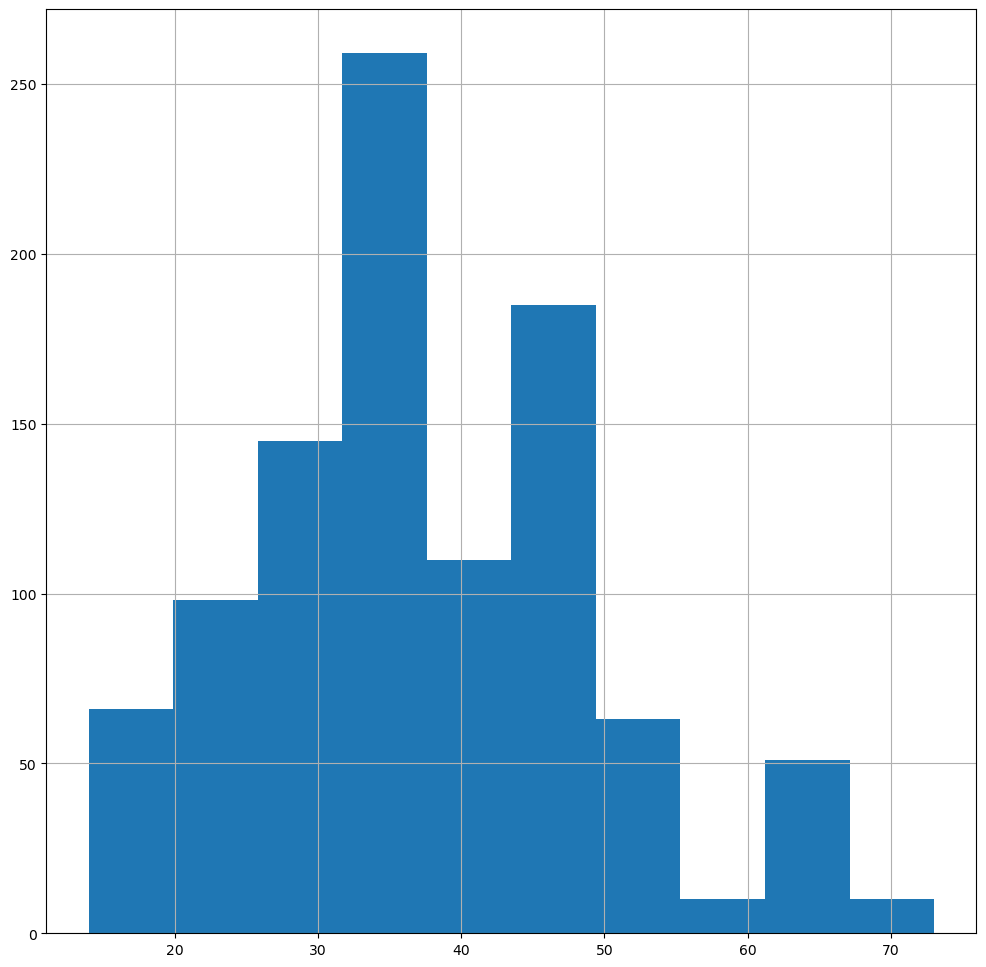

In [46]:
plt.figure(figsize=[8, 8])
cancer_patient['Age'].hist(figsize=[12, 12]);

#plt.xscale('log')

C:\Users\W7107310\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Age', ylabel='Density'>

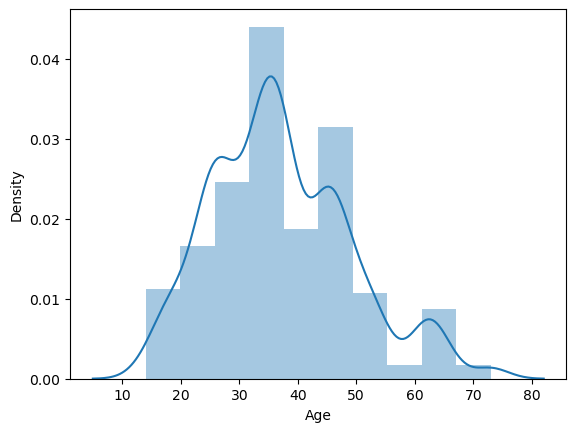

In [47]:
sb.distplot(cancer_patient['Age'], bins = 10)

In [48]:
#random sample
# sample data generation
#np.random.seed(42)

In [49]:
#frequency rating of each symptom
cancer_patient.groupby(["Gender"]).count().transpose()

Gender,1.0,2.0
Patient Id,596,398
Age,595,396
Air Pollution,589,396
Alcohol use,589,393
Dust Allergy,593,394
OccuPational Hazards,591,397
Genetic Risk,591,397
chronic Lung Disease,596,398
Balanced Diet,591,398
Obesity,591,395


In [50]:
#frequency rating of each symptom
cancer_patient.groupby(["Gender"]).median().transpose()

Gender,1.0,2.0
Age,37.0,35.0
Air Pollution,5.0,3.0
Alcohol use,6.0,2.0
Dust Allergy,6.0,4.5
OccuPational Hazards,6.0,4.0
Genetic Risk,6.0,3.0
chronic Lung Disease,6.0,4.0
Balanced Diet,6.0,3.5
Obesity,4.0,4.0
Smoking,4.0,3.0


In [51]:
#frequency rating of each symptom
cancer_patient.groupby(["Level"]).count().transpose()

Level,High,Low,Medium
Patient Id,365,303,332
Age,365,303,329
Gender,365,299,330
Air Pollution,360,301,330
Alcohol use,364,298,326
Dust Allergy,364,301,328
OccuPational Hazards,363,301,330
Genetic Risk,364,302,328
chronic Lung Disease,365,303,332
Balanced Diet,363,301,331


## Clean the data

In [52]:
#replace all NaN with the most frequent age
cancer_patient.Age.fillna(35, inplace = True)

In [53]:
# Replace High with 3, Medium with 2 and Low with 1 in the Level column
cancer_patient['Level'] = cancer_patient['Level'].apply(lambda x: 3  
                                                        if x == 'High' 
                                                        else ( 2 if x == 'Medium' 
                                                              else 1))

In [54]:
# Replace 1 with male and 2 with female in the Gender column
cancer_patient['Gender'] = cancer_patient['Gender'].apply(lambda x: 'Male' if x == 1 else 'Female')

In [55]:
# round up all floats
#cancer_patient_1.round(0).astype(int)
cancer_patient_1.loc[:,'Air Pollution':'Level'] = cancer_patient_1.loc[:,'Air Pollution':'Level'].round(0).astype(int)
cancer_patient_1

NameError: name 'cancer_patient_1' is not defined

In [ ]:
#drop rows of missing values
cancer_patient_nmv = cancer_patient.dropna(axis = 0)

In [ ]:
# number of missing values
cancer_patient_nmv.describe(include='all').transpose()

In [ ]:
plt.figure(figsize=[14, 14])
sb.heatmap(cancer_patient.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)
plt.show()

In [ ]:
#plt.scatter(y = cancer_patient['Obesity'], x = cancer_patient['Genetic Risk'])

In [ ]:
#cancer_patient_clean = pd.read_spss('cancer_patients.sav')

### Explore distributions

In [ ]:
sb.distplot(cancer_patient_nmv['Age'])

### Dealing with outliers

In [ ]:
q_smoker = cancer_patient_nmv['Passive Smoker'].quantile(1)
q_dust = cancer_patient_nmv['Dust Allergy'].quantile(1)
q_tired = cancer_patient_nmv['Fatigue'].quantile(1)
q_weight = cancer_patient_nmv['Weight Loss'].quantile(1)
q_wheezing = cancer_patient_nmv['Wheezing'].quantile(1)

In [ ]:
cancer_patient_1 = cancer_patient_nmv[cancer_patient_nmv['Passive Smoker'] < q_smoker]

In [ ]:
cancer_patient_1 = cancer_patient_1[cancer_patient_1['Dust Allergy'] < q_dust]

In [ ]:
cancer_patient_1 = cancer_patient_1[cancer_patient_1['Fatigue'] < q_tired]

In [ ]:
cancer_patient_1 = cancer_patient_1[cancer_patient_1['Weight Loss'] < q_weight]

In [ ]:
cancer_patient_1 = cancer_patient_1[cancer_patient_1['Wheezing'] < q_wheezing]

In [ ]:
cancer_patient_1.describe(include='all').transpose()
#cancer_patient_1.info()

In [ ]:
sb.distplot(cancer_patient_1['Fatigue'])

In [ ]:
cancer_patient_1.head()

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (14,4), sharey = True)
ax1.scatter(cancer_patient_1['Obesity'], cancer_patient_1['Level'])
ax2.scatter(cancer_patient_1['Coughing of Blood'], cancer_patient_1['Level'])
ax3.scatter(cancer_patient_1['Balanced Diet'], cancer_patient_1['Level'])

In [ ]:
plt.scatter(cancer_patient_1['chronic Lung Disease'], cancer_patient_1['Genetic Risk'])

In [ ]:
cancer_patient_1_high = cancer_patient_1.query('Level == 3')

In [ ]:
plt.figure(figsize=[14, 14])
sb.heatmap(cancer_patient_1.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)
plt.show()

In [ ]:
cancer_patient_1.groupby(['Level']).mean()

### Hypothesis Testing

##### Spearman's correlation

In [ ]:
cancer_patient_1.corr(method='spearman')

### Feature Scaling

In [ ]:
# Example 10-scale Likert data
likert_data = np.array([3, 6, 8, 2, 9, 5, 7, 1, 4, 10])

# Define the new scale range (e.g., 0-1)
new_min = 0
new_max = 1

# Perform linear scaling
scaled_data = (likert_data - np.min(likert_data)) / (np.max(likert_data) - np.min(likert_data)) * (new_max - new_min) + new_min

# Print the scaled data
print(scaled_data)


In [ ]:
np.max(likert_data)

In [ ]:
# Convert data to pandas DataFrame
df = pd.DataFrame({'Likert': scaled_data})

In [ ]:
df

In [ ]:
cancer_patient_1.hist();

In [ ]:
cancer_patient_1.describe(include = 'all')

## Create the regression

#### check for OLS assumptions

### Declare the dependent and the independent variables

In [ ]:
y = cancer_patient_1['Level']
x1 = cancer_patient_1[['Obesity','Coughing of Blood']]

In [ ]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
print(results.summary())

- R is the coef: Pearson correlation coefficient, 
    - R is equal to the correlation between the predictors and dependent variable
- R^2: Prportion/percentage of variance in the dependent variable that is predictable from the independent variable
    - i.e. the % of variance in the cancer level that is predictable from 'Obesity' and 'Coughing of Blood'
    - if the linear regression model is fit well then R^2 will be closer to 1
- Adjusted R^2: is influenced by the number of independent vairables used. 
    - The more variables included in the regression model, the greater the Adjusted R^2
    - The more closer the R^2 and the adjusted one are, then it means relevant features have been selected.
- df = N - 2 = 891 - 2 = 889
- F-statistic value is really large; 
    - p-value of F-statistics(2.87e-250) < (0.05) is close to zero, indicates there is a linear relationship between the features(predictors) and the dependent variables
    
- Lower and upper bound are close to zero.
- Skewness is close to zero but the data is very kurtotic, therefore data deviates from normality
- 

The condition number is small (17.9)

In [ ]:
x2 = cancer_patient_1[['Obesity', 'Coughing of Blood', 'Dust Allergy','OccuPational Hazards',
                       'Alcohol use','Balanced Diet','Passive Smoker', 'chronic Lung Disease', 'Fatigue', 'Chest Pain', 'Shortness of Breath']]

In [ ]:
x = sm.add_constant(x2)
results2 = sm.OLS(y,x).fit()
print(results2.summary())

In [ ]:
y = 0.0832*x+0.1601

In [ ]:
#x3 = cancer_patient_1[['Obesity', 'Coughing of Blood', 'Smoking']]

$$\hat{y} = {\beta}{_0}+{\beta}{_1}x_{_1}+{\beta}{_2}x_{_2}+......+{\beta}{_k}x_{_k}$$



$$\hat{y} = 0.160+0.060x_{_1}+0.081x_{_2}+0.080x_{_3}+0.060x_{_4}+0.080x_{_5}+0.058x_{_6}+0.053x_{_7}+0.040x_{_8}-0.076x_{_9}$$

$$where:x_{_1} = Alcohol Abuse$$
$$x_{_2} = Passive Smoker$$

In [ ]:
cancer_final_clean = pd.read_excel('Cancer data Group E.xlsx')
cancer_final_clean.shape

In [ ]:
cancer_final_clean.isnull().sum()

In [ ]:
yhat = 0.160+0.060*X1+0.081*X2+0.080*X3+0.060*X4+0.080*X5+0.058*X6+0.053*X7+0.040*X8-0.076*X9

In [ ]:
cancer_pred = pd.read_excel('Cancer_Patients_Prediction.xlsx')
cancer_pred.shape

In [ ]:
cancer_pred.sample(10).transpose()

In [ ]:
cancer_pred.info()

In [ ]:
plt.scatter(cancer_pred.Level,cancer_pred.Predicted_Level)
plt.xlabel('Level', fontsize= 20)
plt.ylabel('Predicted_Level', fontsize = 20)
plt.show()

### Research Q1: Are there more males smokers than females?
__Hypothesis__

### Perform Mann-Whitney test on one sample
We have two independent groups: __Male and Female__ and a dependent variable:"__Smoking__". From the visuals below we conclude that Smoking does not come from data that follows a normal distribution

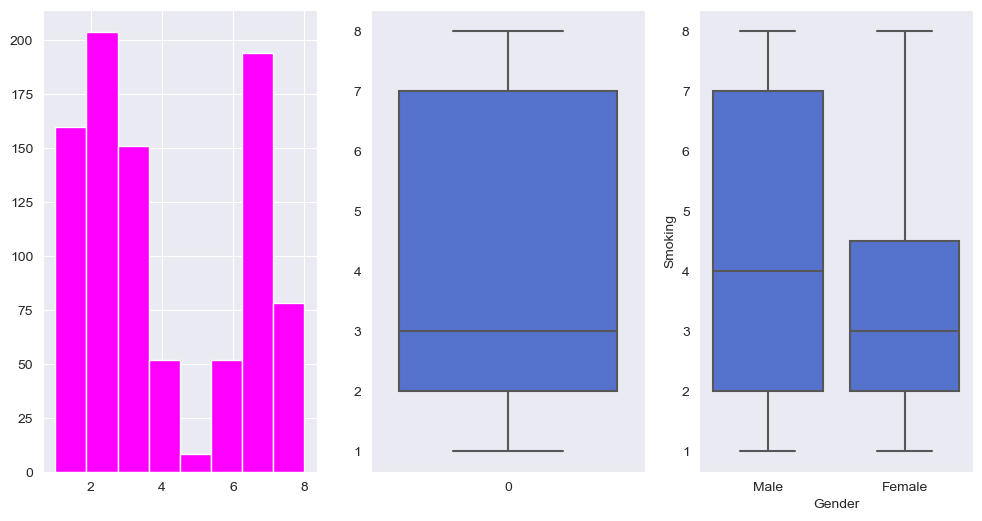

In [90]:
#Plots to show frequencies and descriptive stats.
plt.figure(figsize=[12, 6])


plt.subplot(1, 3, 1)
cancer_patients['Smoking'].hist(color = 'fuchsia', bins = 8)

plt.subplot(1, 3, 2)
sb.boxplot(data = cancer_patients['Smoking'], color = 'royalblue');

plt.subplot(1, 3, 3)
sb.boxplot(data = cancer_patients, x = 'Gender', y = 'Smoking',  color = 'royalblue');

plt.show();


mean = 3, mode = 2, standard deviation = , N=? 
- On the boxplot, for females 50%, 
- 50% of males rated between 2 and 7 for smoking, while females rated between 2 and 4
- There is a higher median score for males smokers than females

In [73]:
males = cancer_patients.query("Gender == 'Male'")
females = cancer_patients.query("Gender == 'Female'")

In [74]:
# independent samples mann-whitney u test
U1, p = mannwhitneyu(males['Smoking'], females['Smoking'], alternative = 'two-sided', method = 'asymptotic')

In [84]:
print(U1)
U2 = (len(males)*len(females)) - U1
print(U2)
print(p)

119079.5
76328.5
1.3597458885135917e-08


The sum of rankings for males is 119079.5 with N = 531. Therefore the mean ranking for males = 119079.5/531 which __224.255__

The sum of rankings for females = 76328.5 and N = 368. Therefore the mean ranking for females = 76328.5/368 which __207.414__

The mean ranking of males is greater than those of females and the asymptotic significance < 0, so the p-value < 0.05. Therefore we reject the null hypothesis and conclude that there are slightly more males smokers than females

### Research Q2: Is the distribution of Passive Smokers the same across all categories of Gender?
__Hypothesis:__

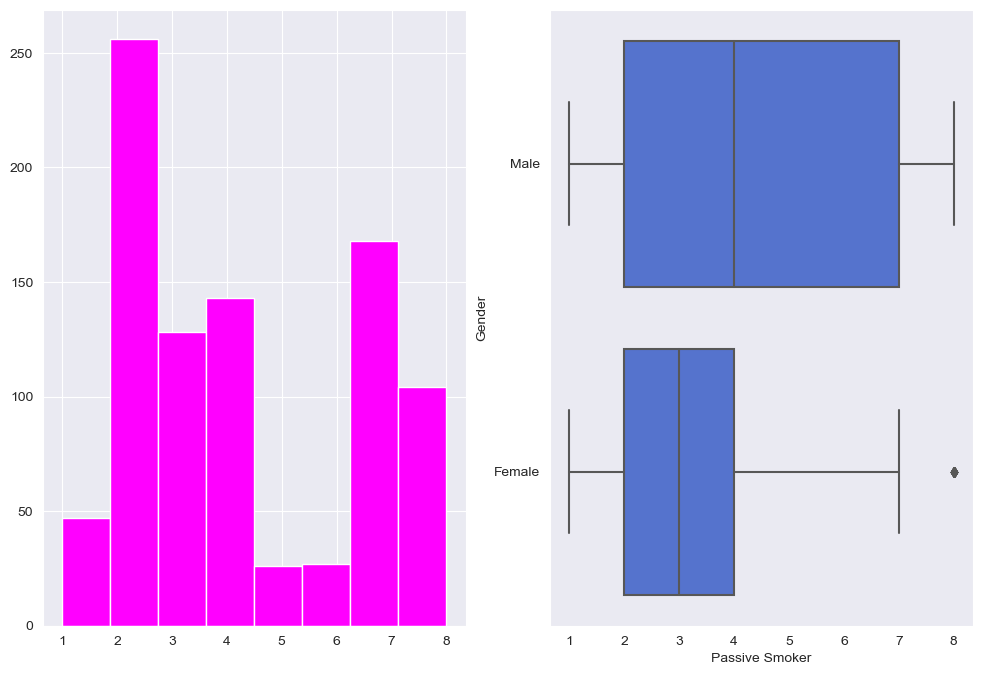

In [86]:
#Plots to show frequencies and descriptive stats.
plt.figure(figsize=[12, 8])


plt.subplot(1, 2, 1)
cancer_patients['Passive Smoker'].hist(color = 'fuchsia', bins = 8)

plt.subplot(1, 2, 2)
sb.boxplot(data = cancer_patients, x = 'Passive Smoker', y = 'Gender',  color = 'royalblue');

plt.show();

- mean = 3, mode = 2, standard deviation = , N=? 
- On the box plot, we see that for feamles, 50% of the risk scores for passive smoking lie between the low ratings of 2 and 4
- While for males, more than 50% of the males of the risk scores are greater than the rating of 4
- There is a higher median score for males than females

In [76]:
# independent samples mann-whitney u test
U1_a, p_a = mannwhitneyu(males['Passive Smoker'], females['Passive Smoker'], alternative = 'two-sided', 
                         method = 'asymptotic')

In [83]:
print(U1_a)
U2_a = (len(males)*len(females)) - U1_a
print(U2_a)
print(p_a)
print(males.shape)
print(females.shape)

114965.0
80443.0
4.275244064181747e-06
(531, 15)
(368, 15)


The sum of rankings for males is 114 965 with N = 531. Therefore the mean ranking for males = 114965/531 which __216.507__

The sum of rankings for females = 80443 and N = 368. Therefore the mean ranking for females = 80443/368 which __218.595__

The mean ranking of females is greater than those of males and the p-value < 0.05. Therefore we reject the null hypothesis and conclude that females are slightly more exposed to second hand smoke than males. 

__This conclusion agrees with the finding that males are predominant smokers. As a result females will most likely be exposed to second hand smoke__

### Research Q3: Is second hand smoking equally distributed across all levels of cancer?
__Hypothesis:__